<a href="https://colab.research.google.com/github/shashwat2820/deep-learning/blob/main/complete_fashion_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 



In [ ]:
#loading the dataset 

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler

num_workers = 0 

batch_size = 20 

valid_size = 0.2 


train_data = datasets.FashionMNIST('data' , train = True , download = True , transform = ToTensor() )
test_data  = datasets.FashionMNIST('data' , train = False , download = True , transform = ToTensor())

train_num = len(train_data)
indices = list(range(train_num))
np.random.shuffle(indices)
split = int(np.floor(valid_size*train_num))
train_idx , valid_idx = indices[split:] , indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data  , batch_size = batch_size , sampler  = train_sampler , num_workers  = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data , batch_size = batch_size , sampler = valid_sampler , num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data , batch_size = batch_size ,  num_workers = num_workers )



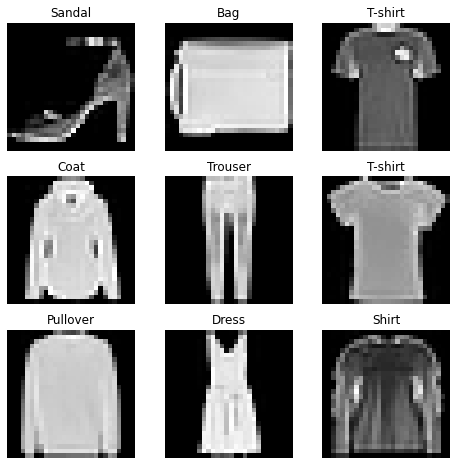

In [ ]:
#visulaising the data 

classes = ["T-shirt" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag", "Ankle Boot"]


fig = plt.figure(figsize=(8,8))
cols , rows = 3,3
for i in range(1 , rows*cols+1):
  sample_idx = torch.randint(len(train_data) , size=(1,)).item()
  img , label = train_data[sample_idx]
  fig.add_subplot(rows,cols,i)
  plt.title(classes[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")
plt.show()



In [ ]:
# defining the Network Architecture

import torch.nn as nn 
import torch.nn.functional as F

class NET(nn.Module):
  def __init__(self):
    super(NET,self).__init__()

    hidden_1 = 512
    hidden_2 = 512

    self.fc1 = nn.Linear(28*28 , hidden_1)
    # definig the first fully connected hidden layer (hidden_1 -> hidden_2)
    self.fc2 = nn.Linear(hidden_1 , hidden_2)
    # defining the output layer (hidden_2 -> output_layer)
    self.fc3 = nn.Linear(hidden_2 , 10)

    #defining the dropout layer
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = x.view(-1 , 28*28)


    # add the the hidden layer with relu activation function and dropout layer
    x = self.dropout(F.relu(self.fc1(x)))
    # add the the hidden layer with relu activation function and dropout layer
    x = self.dropout(F.relu(self.fc2(x)))
    #add the output layer with log_softmax activation 
    x = self.fc3(x) 


    return x 

model = NET()
print(model)

#print(images.shape) --> torch.Size([20, 1, 28, 28])

#images = images.view(-1,28*28)
#print(images.shape) --> torch.Size([20, 784])



NET(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
torch.Size([20, 1, 28, 28])
torch.Size([20, 784])


In [ ]:
#defining the optimizer 

import torch.optim as optim 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.03)

In [ ]:
#training and validation loop 

epochs = 30 

valid_loss_min = np.Inf

for epoch in range(1,epochs+1):

  train_loss = 0.0 
  valid_loss = 0.0

  model.train()
  for data , target in train_loader:

    optimizer.zero_grad()

    output = model(data)

    loss = criterion(output , target)

    loss.backward()

    optimizer.step()

    train_loss += loss.item()*data.size(0)

  model.eval()
  for data , target in valid_loader:
    output = model(data)

    loss = criterion(output,target)

    valid_loss += loss.item()*data.size(0)

  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(valid_loader.sampler)

  print('Epoch:{} \t training loss: {:.6f}  \t validation loss : {:.6f} '.format(epoch , train_loss , valid_loss))

  if valid_loss <= valid_loss_min:
    print('The validation loss decresed from {:.6f} ---> {:.6f}  saving model'.format(valid_loss_min , valid_loss))
  
  torch.save(model.state_dict() , 'complete_fashion_mnist_cnn.pt')

  valid_loss_min = valid_loss




Epoch:1 	 training loss: 0.702349  	 validation loss : 0.473858 
The validation loss decresed from inf ---> 0.473858  saving model
Epoch:2 	 training loss: 0.457681  	 validation loss : 0.420986 
The validation loss decresed from 0.473858 ---> 0.420986  saving model
Epoch:3 	 training loss: 0.406682  	 validation loss : 0.382552 
The validation loss decresed from 0.420986 ---> 0.382552  saving model
Epoch:4 	 training loss: 0.377151  	 validation loss : 0.383322 
Epoch:5 	 training loss: 0.357196  	 validation loss : 0.343150 
The validation loss decresed from 0.383322 ---> 0.343150  saving model
Epoch:6 	 training loss: 0.340023  	 validation loss : 0.340944 
The validation loss decresed from 0.343150 ---> 0.340944  saving model
Epoch:7 	 training loss: 0.325505  	 validation loss : 0.334594 
The validation loss decresed from 0.340944 ---> 0.334594  saving model
Epoch:8 	 training loss: 0.316116  	 validation loss : 0.330019 
The validation loss decresed from 0.334594 ---> 0.330019  s

In [ ]:
#loading the saved model
model.load_state_dict(torch.load('complete_fashion_mnist_cnn.pt'))


<All keys matched successfully>

In [ ]:
#test loop

test_loss = 0.0 

#for dividign the test set results amomg the various classes 
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


model.eval()
for data , target in test_loader:

  output = model(data)

  loss = criterion(output,target)

  test_loss += loss.item()*data.size(0)

  _,pred = torch.max(output , 1)

  correct_tensor = pred.eq(target.data.view_as(pred))

  correct = np.squeeze(correct_tensor.numpy()) 

  for i in range(batch_size):

    label = target.data[i]
    class_correct[label] +=correct[i].item()
    class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('test loss : {:.6f} \n'.format(train_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))




test loss : 0.191966 

Test Accuracy of T-shirt: 84% (849/1000)
Test Accuracy of Trouser: 98% (984/1000)
Test Accuracy of Pullover: 83% (834/1000)
Test Accuracy of Dress: 86% (867/1000)
Test Accuracy of  Coat: 83% (831/1000)
Test Accuracy of Sandal: 95% (958/1000)
Test Accuracy of Shirt: 69% (695/1000)
Test Accuracy of Sneaker: 96% (960/1000)
Test Accuracy of   Bag: 97% (973/1000)
Test Accuracy of Ankle Boot: 95% (958/1000)

Test Accuracy (Overall): 89% (8909/10000)


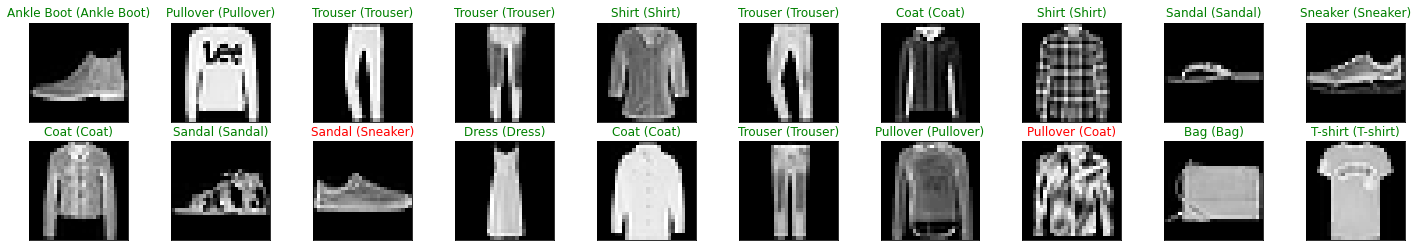

In [ ]:
#obtaining a batch of tetsing images 
dataiter = iter(test_loader)
images , labels = dataiter.next()
images.numpy() #converting images to numpy for visualization


output = model(images)

_,preds_tensor =  torch.max(output , 1)

preds = np.squeeze(preds_tensor.numpy()) 

fig = plt.figure(figsize=(25,4))
#visaulising the 20 images in batch
for idx in np.arange(20):
  ax = fig.add_subplot(2 , 20/2 , idx+1 , xticks = [] , yticks = [])
  ax.imshow(np.squeeze(images[idx]) , cmap="gray")
  ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
plt.show()
